In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
%matplotlib inline
pd.set_option('max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [7]:
data = pd.read_csv('/content/archive (26).zip')

In [8]:
data

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,Delhi,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,Uttar Pradesh,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,Maharashtra,2011,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,computer science & engineering,80.40,8195,1,Delhi,2013,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,biotechnology,64.30,4889,1,Tamil Nadu,2012,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,103174,f,1989-04-17,75.00,0,2005,73.00,0,1263,2,B.Tech/B.E.,electronics and communication engineering,70.00,1263,1,Tamil Nadu,2010,505,485,445,0.538387,245,333,-1,-1,-1,-1,-1,-1.1901,0.9688,-1.0697,1.35490,0.0284,120000
2994,352811,f,1991-07-22,84.00,state board,2008,77.00,state board,9481,2,B.Tech/B.E.,information technology,75.20,9481,0,Tamil Nadu,2012,345,585,395,0.190153,315,-1,-1,-1,-1,-1,-1,-0.1082,0.0328,-0.4891,-0.29020,0.5024,120000
2995,287070,m,1988-11-24,91.40,bsemp,2006,65.56,bsemp,547,2,B.Tech/B.E.,information technology,73.19,547,0,Madhya Pradesh,2011,385,425,485,0.600057,435,-1,-1,-1,-1,-1,-1,-0.8810,0.1888,-0.3440,0.06230,0.6603,385000
2996,317336,m,1988-08-25,88.64,karnataka education board,2006,65.16,karnataka education board,1629,2,B.Tech/B.E.,computer engineering,74.81,1629,1,Karnataka,2011,465,645,505,0.901490,545,-1,-1,-1,-1,-1,-1,1.4374,1.2808,-0.4891,-1.46537,0.5419,530000


In [9]:
data = data.drop(['ID','CollegeCityID','CollegeID','DOB'], axis =1)
data = data.drop(data[data['Degree'] == 'M.Sc. (Tech.)'].index, axis =0)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2997 entries, 0 to 2997
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2997 non-null   object 
 1   10percentage           2997 non-null   float64
 2   10board                2997 non-null   object 
 3   12graduation           2997 non-null   int64  
 4   12percentage           2997 non-null   float64
 5   12board                2997 non-null   object 
 6   CollegeTier            2997 non-null   int64  
 7   Degree                 2997 non-null   object 
 8   Specialization         2997 non-null   object 
 9   collegeGPA             2997 non-null   float64
 10  CollegeCityTier        2997 non-null   int64  
 11  CollegeState           2997 non-null   object 
 12  GraduationYear         2997 non-null   int64  
 13  English                2997 non-null   int64  
 14  Logical                2997 non-null   int64  
 15  Quan

In [11]:
data.describe()

,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2.997000e+03
mean,77.667821,2008.080747,74.350117,1.924925,71.506623,0.296296,2011.939606,501.051718,500.395062,514.122456,0.508961,351.817484,96.260594,94.178846,24.147147,16.273607,31.079079,1.947948,-0.038626,0.127133,-0.008001,-0.145639,-0.140679,3.051231e+05
std,10.004091,1.632086,11.111092,0.263556,8.121888,0.456699,36.786715,105.319025,87.291461,122.212473,0.462630,204.541220,158.754296,177.805704,99.800733,86.068521,103.568586,32.246836,1.025134,0.954674,0.962176,1.012913,1.007024,2.123478e+05
min,43.000000,1998.000000,40.000000,1.000000,6.630000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,71.130000,2007.000000,66.000000,2.000000,66.520000,0.000000,2012.000000,425.000000,440.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,79.000000,2008.000000,74.000000,2.000000,71.800000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05
75%,85.600000,2009.000000,82.600000,2.000000,76.300000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.837621,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,97.760000,2012.000000,98.700000,2.000000,99.930000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,804.000000,612.000000,715.000000,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


In [12]:
data.columns

Index(['Gender', '10percentage', '10board', '12graduation', '12percentage',
       '12board', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Salary'],
      dtype='object')

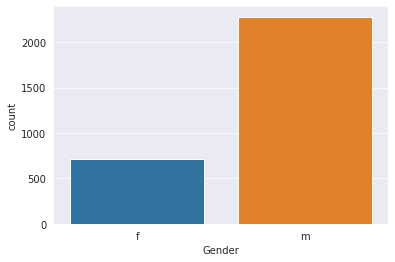

In [13]:
sns.countplot(x = 'Gender', data = data)

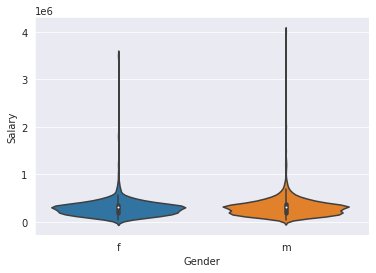

In [14]:
sns.violinplot(x = 'Gender',y = 'Salary', data = data)

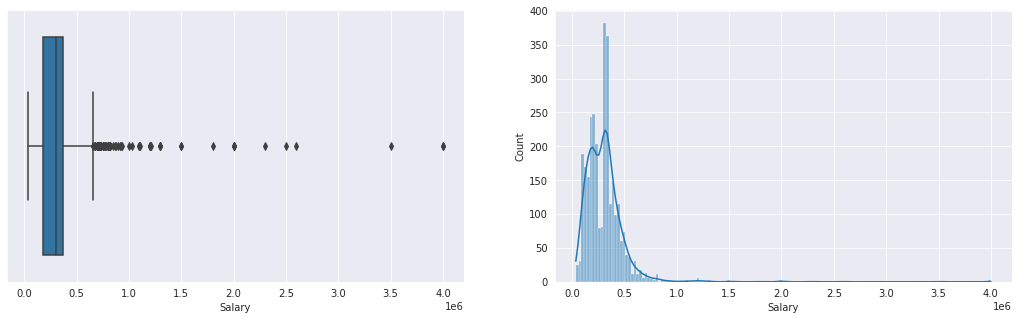

In [15]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(x = 'Salary', data = data)
plt.subplot(1,2,2)
sns.histplot(x = 'Salary', data = data, kde = True)

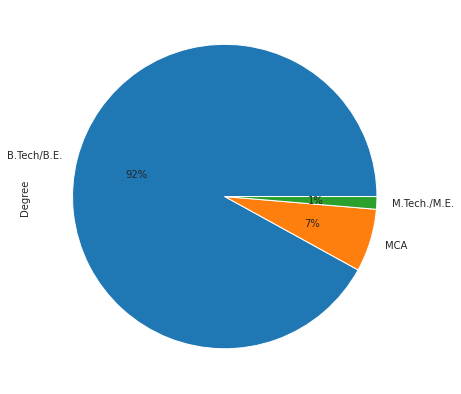

In [16]:
plt.figure(figsize = (7,7))
data['Degree'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')

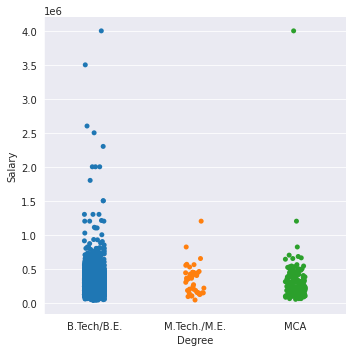

In [17]:
sns.catplot(x = 'Degree', y ='Salary', data = data)

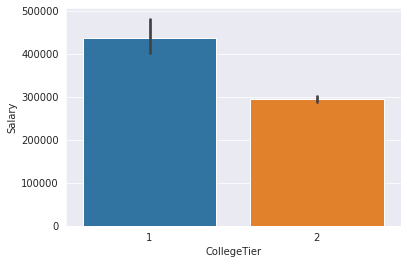

In [18]:
sns.barplot(x = 'CollegeTier', y ='Salary', data = data)

In [19]:
data['CollegeCityTier'] = data['CollegeCityTier'].astype('object')
data['CollegeTier'] = data['CollegeTier'].astype('object')

In [20]:
data.select_dtypes('number').columns[:-1]

Index(['10percentage', '12graduation', '12percentage', 'collegeGPA',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

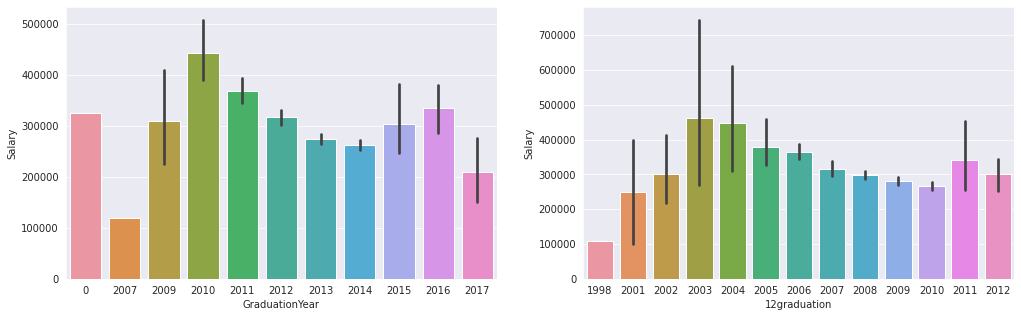

In [21]:
plt.figure(figsize = (17,5))
plt.subplot(1,2,1)
sns.barplot(data = data , x = 'GraduationYear',y = 'Salary')
plt.subplot(1,2,2)
sns.barplot(data = data , x = '12graduation',y = 'Salary')

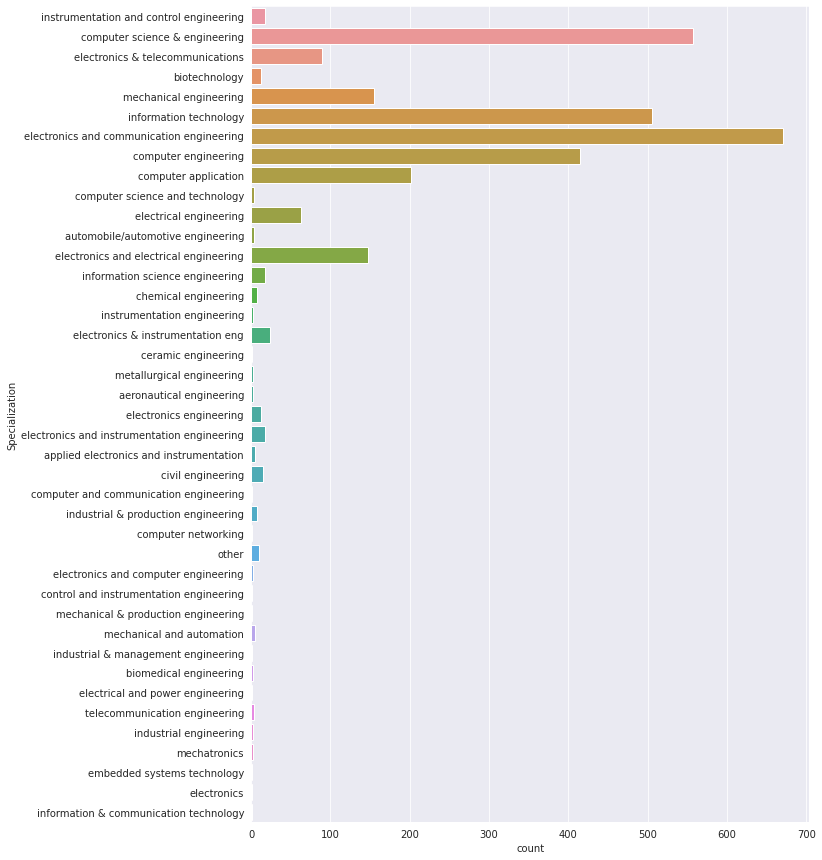

In [22]:
plt.figure(figsize = (10,15))
sns.countplot(y = 'Specialization',data = data)

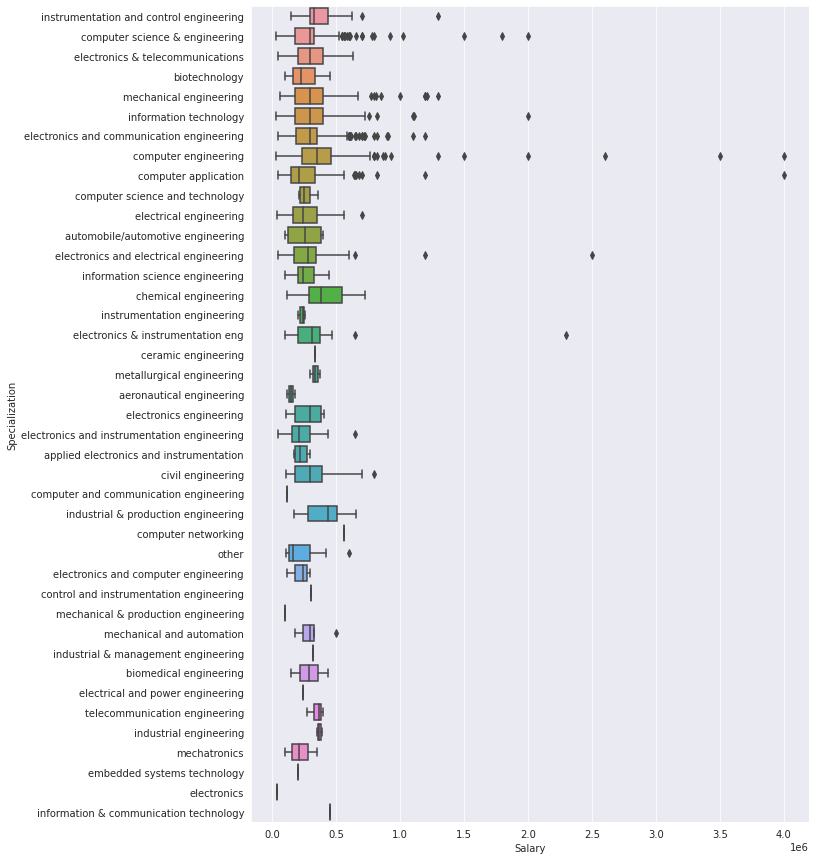

In [23]:
plt.figure(figsize = (10,15))
sns.boxplot(y = 'Specialization',x = 'Salary',data = data)

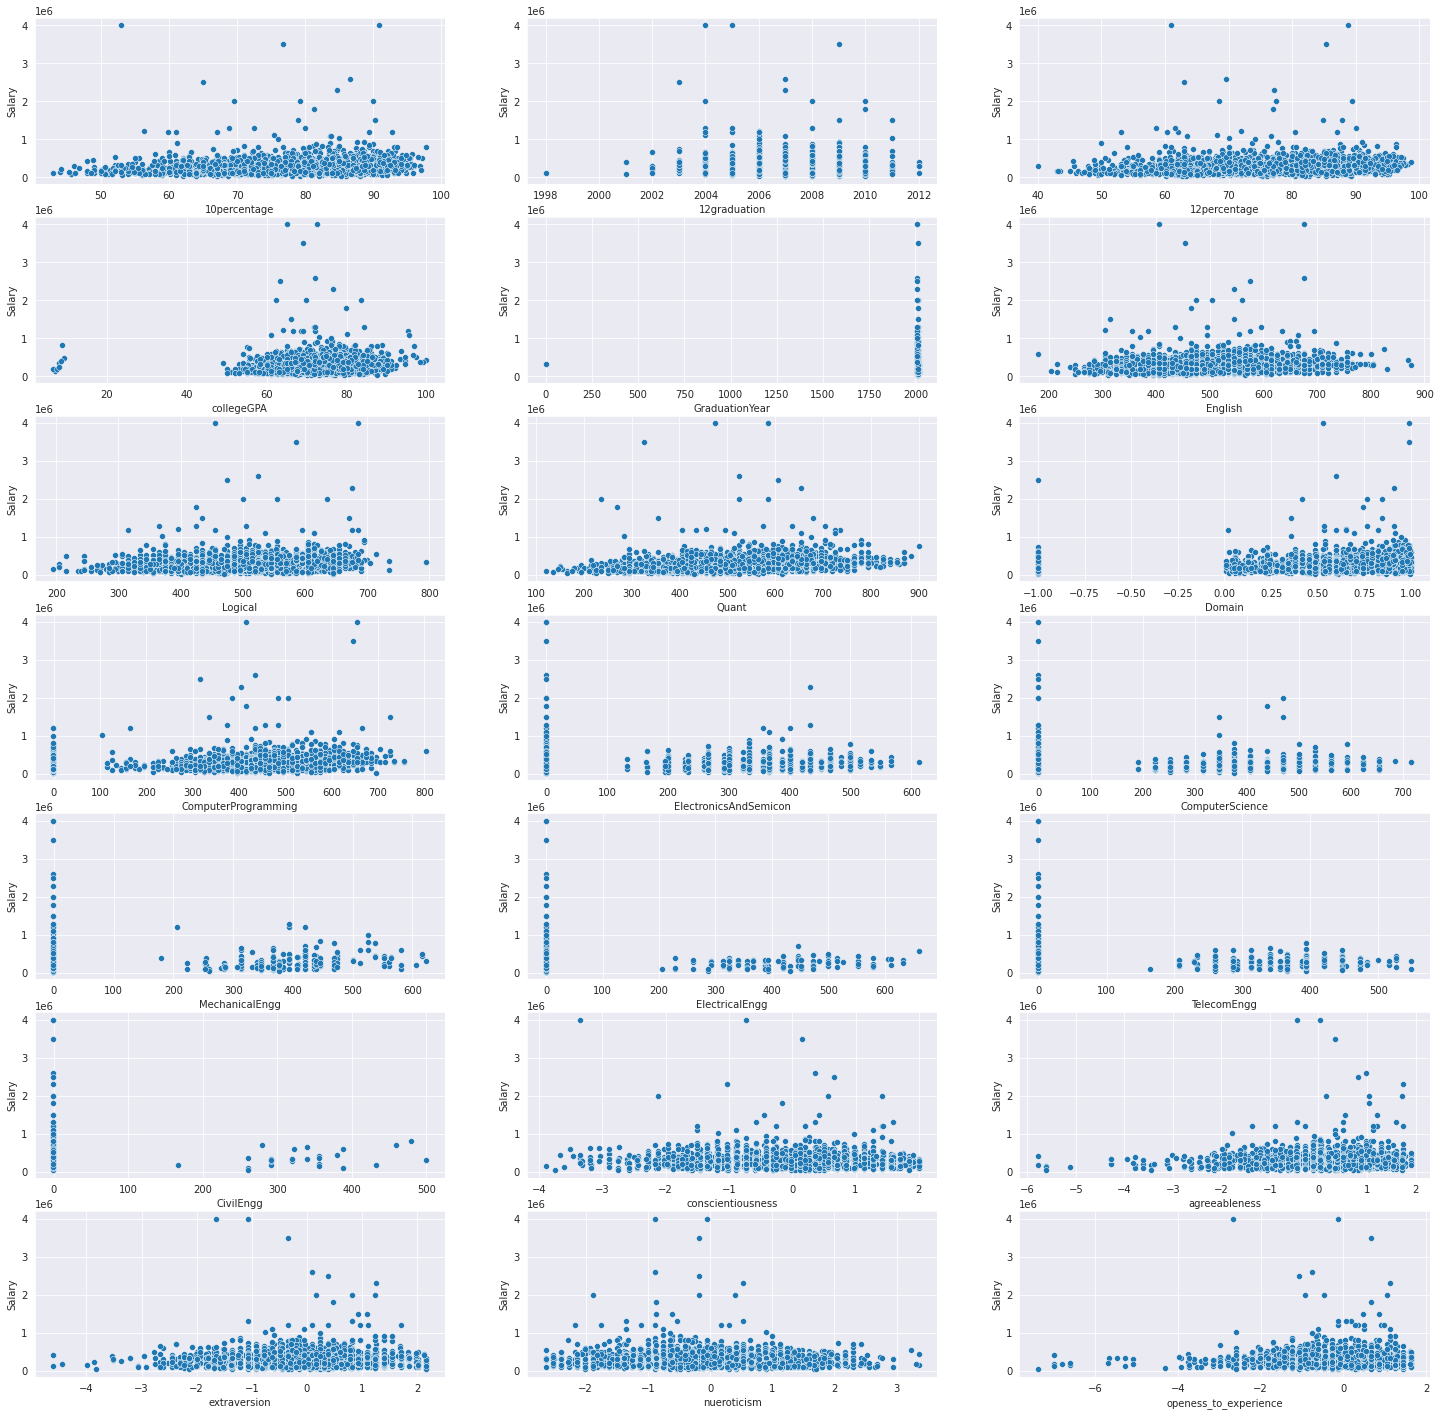

In [24]:
plt.figure(figsize = (25,25))
for i,col in enumerate(data.select_dtypes('number').columns[:-1]):
    plt.subplot(7,3,i+1)
    sns.scatterplot(x = col, y = 'Salary', data = data)
plt.show()

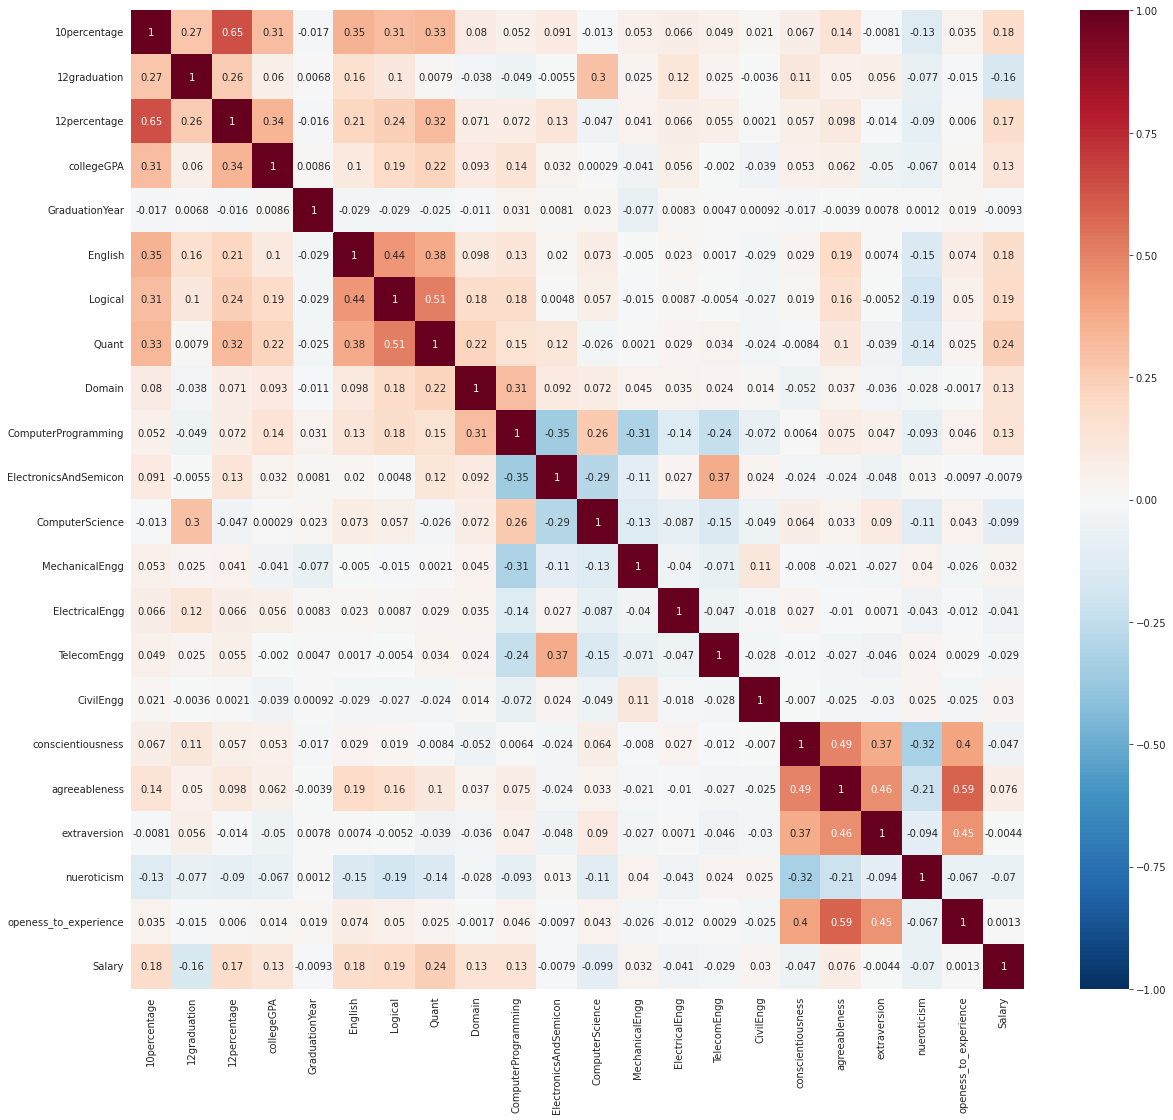

In [25]:
plt.figure(figsize = (20,18))
sns.heatmap(data.corr(), data = data, annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'RdBu_r')

In [26]:
##prepocessing

In [31]:
data = pd.read_csv('/content/archive (26).zip')

In [32]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [33]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop ID column
    df = df.drop('ID', axis=1)
    
    # Binary encoding
    df['Gender'] = df['Gender'].replace({'f': 0, 'm': 1})
    
    # Date encoding
    df['DOB'] = pd.to_datetime(df['DOB'])
    df['DOB_year'] = df['DOB'].apply(lambda x: x.year)
    df['DOB_month'] = df['DOB'].apply(lambda x: x.month)
    df['DOB_day'] = df['DOB'].apply(lambda x: x.day)
    df = df.drop('DOB', axis=1)
    
    # One-hot encoding
    for column in ['10board', '12board', 'Degree', 'Specialization', 'CollegeState']:
        df = onehot_encode(df, column)
    
    # Encode and fill missing values
    df = df.replace(-1, np.NaN)
    missing_columns = [column for column in df.columns if df.isna().sum()[column] > 0]
    for column in missing_columns:
        df[column] = df[column].fillna(df[column].mean())
    
    # Split df into X and y
    y = df['Salary']
    X = df.drop('Salary', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    
    return X_train, X_test, y_train, y_test

In [34]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [35]:
X_train

,Gender,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,DOB_year,DOB_month,DOB_day,10board_0,10board_aisse,10board_andhra pradesh board ssc,10board_andhra pradesh state board,10board_anglo indian,10board_ap state board,10board_ap state board for secondary education,10board_apsche,10board_apssc,10board_aurangabad board,10board_bharathi matriculation school,10board_bihar board,10board_bihar school examination board,10board_bihar school examination board patna,"10board_bihar secondary education board,patna",10board_biharboard,10board_board of secondary education,10board_board of high school and intermediate education uttarpradesh,10board_board of school education harayana,10board_board of secendary education orissa,10board_board of secondary education,10board_board of secondary education (bse) orissa,10board_board of secondary education - andhra pradesh,10board_board of secondary education orissa,10board_board of secondary education(bse) orissa,"10board_board of secondary education, andhra pradesh","10board_board of secondary education, rajasthan","10board_board of secondary education,andhara pradesh","10board_board of secondary education,andhra pradesh","10board_board of secondary education,ap",10board_board of secondary school education,10board_board of ssc education andhra pradesh,"10board_board ofsecondary education,ap",10board_board secondary education,"10board_bright way college, (up board)",10board_bse,"10board_bse, odisha","10board_bse,odisha","10board_bse,orissa",10board_bseb,10board_bseb patna,"10board_bseb, patna","10board_bseb,patna",10board_bsemp,10board_bsepatna,10board_cbsc,10board_cbse,10board_cbse,10board_cbse board,10board_central board of secondary education,"10board_central board of secondary education, new delhi",10board_certificate of middle years program of ib,10board_cgbse,10board_council for indian school certificate examination,"10board_dav public school,hehal",10board_delhi board,10board_delhi public school,10board_education board of kerala,10board_ghseb,10board_gseb,10board_gsheb,10board_gujarat board,10board_gujarat state board,10board_gyan bharati school,10board_haryana board of school education,10board_hbsc,10board_hbse,10board_himachal pradesh board,10board_himachal pradesh board of school education,10board_hsc,10board_hsce,10board_hse,"10board_hse,board","10board_hse,orissa",10board_icse,10board_icse board,"10board_icse board , new delhi",10board_j & k bord,10board_j&k state board of school education,10board_jawahar navodaya vidyalaya,"10board_jbse,jharkhand",10board_jharkhand academic council,10board_jharkhand acedemic council,10board_jharkhand secondary board,10board_jharkhand secondary education board,10board_jharkhand secondary examination board (ranchi),10board_jkbose,10board_jseb,10board_kalaimagal matriculation higher secondary school,10board_karnataka,10board_karnataka board,10board_karnataka board of higher education,10board_karnataka board of secondary education,10board_karnataka education board,10board_karnataka education board (keeb),10board_karnataka secondary education,10board_karnataka secondary education board,10board_karnataka secondary education examination board,10board_karnataka secondary eduction,10board_karnataka secondary school of examination,10board_karnataka secondory education board,10board_karnataka sslc board bangalore,10board_karnataka state board,10board_karnataka state education examination board,10board_karnataka state secondary education board,10board_kea,10board_kerala state board,10board_kerala state technical education,10board_kiran english medium high school,10board_kolhapur,10board_ksbe,10board_kseb,10board_kseeb,10board_kseeb(karnataka secondary education examination board),10

In [36]:
y_train

2833     480000
1792     200000
957      325000
1385     290000
1307    2000000
         ...   
2763     700000
905      120000
1096     180000
235      310000
1061     300000
Name: Salary, Length: 2098, dtype: int64

In [37]:
##training

In [38]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

lin_r2 = lin_model.score(X_test, y_test)

print("Linear Regression R^2 Score: {:.5f}".format(lin_r2))

Linear Regression R^2 Score: -1598854017282798970082426880.00000


In [39]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

xgb_r2 = xgb_model.score(X_test, y_test)

print("XGBoost R^2 Score: {:.5f}".format(xgb_r2))

[12:16:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost R^2 Score: 0.11398


In [ ]:
failed model
